<a href="https://colab.research.google.com/github/jspinerola/AI-Assignments/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import sklearn, datasets

digits = sklearn.datasets.load_digits()

data = digits.data
target = digits.target

print(data.shape)
print(target.shape)

(1797, 64)
(1797,)


In [ ]:
# shuffle data
import numpy as np

shuffled_indices = np.random.permutation(len(data))

shuffled_data = data[shuffled_indices]
shuffled_target = target[shuffled_indices]

# split data, 70% of data for the train set, 15% for the dev set, and 15% for the test set
total_length = len(shuffled_data)

train_length = int(total_length * 0.7)
dev_end = train_length + int(total_length * 0.15)

train_data = shuffled_data[:train_length]
train_target = shuffled_target[:train_length]

dev_data = shuffled_data[train_length:dev_end]
dev_target = shuffled_target[train_length:dev_end]

test_data = shuffled_data[dev_end:]
test_target = shuffled_target[dev_end:]

# verify results
print(len(train_data))
print(len(dev_data))
print(len(test_data))
print(len(test_data) + len(dev_data) + len(train_data))

1257
269
271
1797


In [ ]:
# distance formulas
def euclidean_distance(sample_1, sample_2):
  dist = 0.0

  for i in range(len(sample_1)):
    dist += (sample_1[i] - sample_2[i]) ** 2

  return np.sqrt(dist)

# test euclidean distance formula
print(euclidean_distance(train_data[0], train_data[1]))

def manhattan_distance(sample_1, sample_2):
  dist = 0.0

  for i in range(len(sample_1)):
    dist += np.abs(sample_1[i] - sample_2[i])

  return dist

# test manhattan distance formula
print(manhattan_distance(train_data[0], train_data[1]))



52.78257288158659
256.0


In [ ]:
def knn(train_data, train_target, test_sample, k, dist_function=euclidean_distance):
  # get distances between test data and each row of training dataset
  result = []

  for i in range(len(train_data)):
    train_sample = train_data[i]
    train_target_sample = train_target[i]

    dist = dist_function(test_sample, train_sample)
    result.append((dist, train_target_sample))

  # sort distances
  result.sort(key=lambda x: x[0])

  # return k-nearest neighbors

  return result[:k]

# prediction function
def predict(neighbors, dist_function=euclidean_distance):
  pred_labels = []

  for neighbor in neighbors:
    pred_labels.append(neighbor[1])

  freq_dict = {}
  max_freq = 0
  max_label = None

  for label in pred_labels:
    if label not in freq_dict:
      freq_dict[label] = 1
    else:
      freq_dict[label] += 1
    if freq_dict[label] > max_freq:
      max_freq = freq_dict[label]
      max_label = label

  return max_label

In [ ]:
# test single sample
k = 5

# get test sample
sample = test_data[1]
true_label = test_target[1]

#get neighbors and predict
neighbors = knn(train_data, train_target, sample, k)
pred_label = predict(neighbors)

# print(neighbors)
print(f"predicted label: {pred_label}")
print(f"true label: {true_label}")

predicted label: 2
true label: 2


In [ ]:
# function to test model with hyperparameters k and dist_function
def test_model(k, dist_function):
  print(f"k: {k}")
  print(f"distance function: {dist_function.__name__}")
  correct = 0

  for i in range(len(test_data)):
    neighbors = knn(train_data, train_target, test_data[i], k, dist_function)
    pred_label = predict(neighbors)

    if pred_label == test_target[i]:
      correct += 1

  print(f"accuracy: {correct / len(test_data)}")
  print("\n")

In [ ]:
# testing diff ks with euclid. and manhattan distance
for k in [1, 3, 5, 7, 9]:
  test_model(k, euclidean_distance)
  test_model(k, manhattan_distance)

k: 1
distance function: euclidean_distance
accuracy: 0.988929889298893


k: 1
distance function: manhattan_distance
accuracy: 0.981549815498155


k: 3
distance function: euclidean_distance
accuracy: 0.985239852398524


k: 3
distance function: manhattan_distance
accuracy: 0.977859778597786


k: 5
distance function: euclidean_distance
accuracy: 0.985239852398524


k: 5
distance function: manhattan_distance
accuracy: 0.977859778597786


k: 7
distance function: euclidean_distance
accuracy: 0.992619926199262


k: 7
distance function: manhattan_distance
accuracy: 0.981549815498155


k: 9
distance function: euclidean_distance
accuracy: 0.985239852398524


k: 9
distance function: manhattan_distance
accuracy: 0.977859778597786




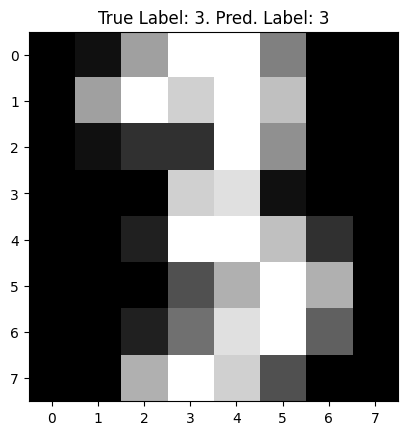

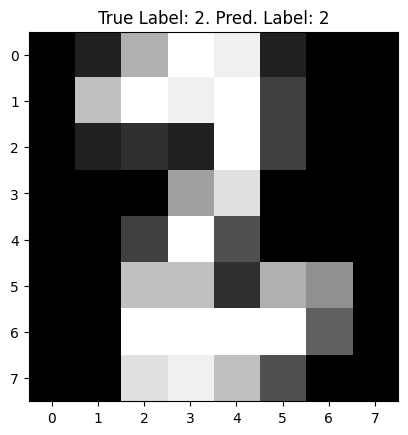

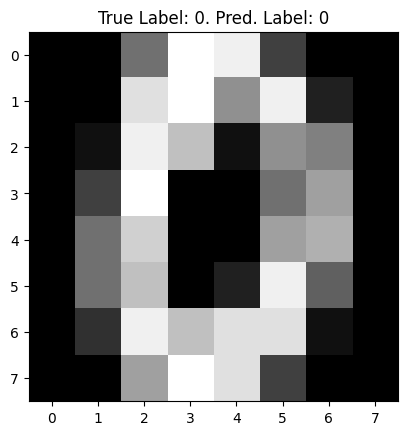

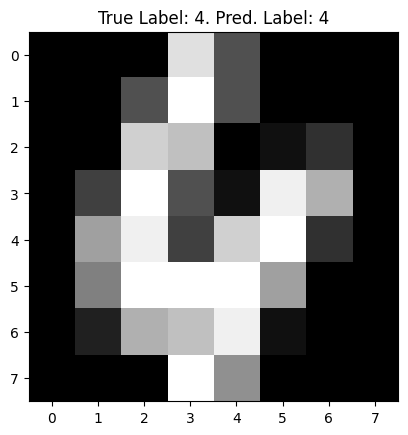

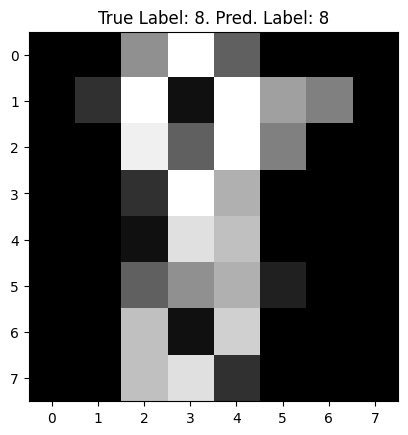

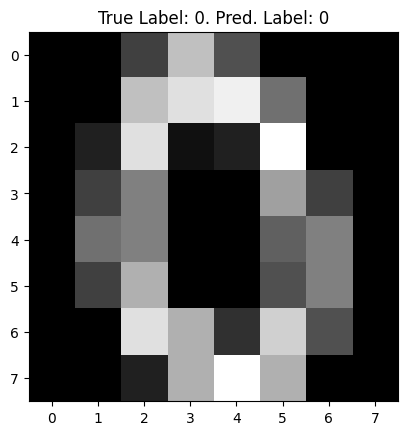

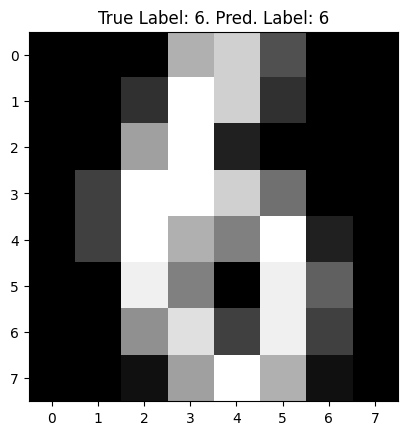

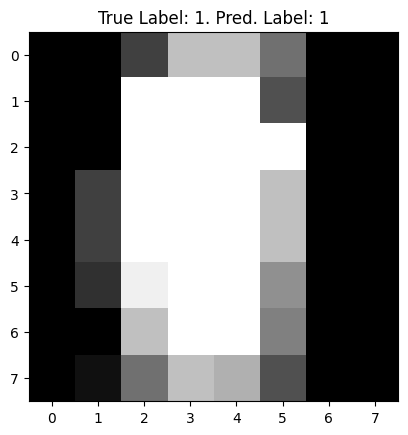

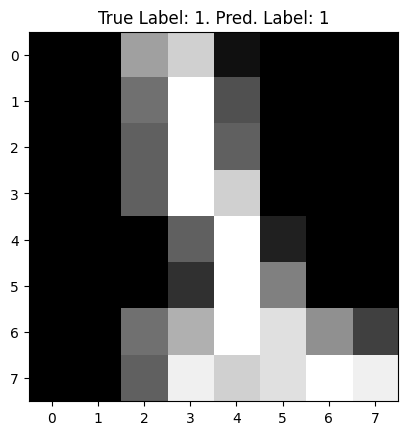

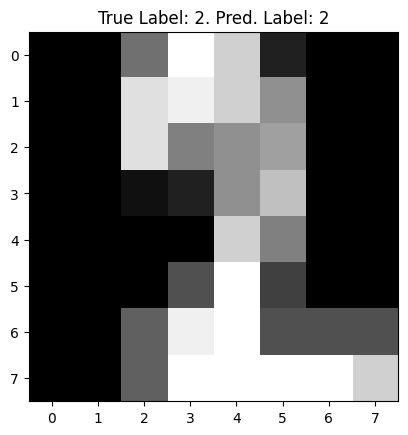

In [ ]:
# randomly select 10 data samples from the test set and specify the ground truth label and the predicted label for each sample.

rand_sample_indices = np.random.permutation(len(test_data))[:10]

for i in rand_sample_indices:
  neighbors = knn(train_data, train_target, test_data[i], 5)
  pred_label = predict(neighbors)

  resharp_sample = test_data[i].reshape(8, 8)

  plt.imshow(resharp_sample, cmap='gray')
  title = f"True Label: {test_target[i]}. Pred. Label: {pred_label}"
  plt.title(title)
  plt.show()

import matplotlib.pyplot as plt


